# Data :
## This data is about home price in Bangalore[India]

# Problem :
## This is a regression problem where we have to estimate the home price based on location, bhk, total sqft, bathroom and balcony etc.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Loading the data

In [2]:
df = pd.read_csv(r"D:\Data\New folder\Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,bhk,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Defence Colony,10,NaN,7150,13.0,NaN,3600.0
1,Super built-up Area,18-Jan,Ashok Nagar,4,NaN,8321,5.0,2.0,2912.0
2,Plot Area,Ready To Move,Defence Colony,6,NaN,8000,6.0,3.0,2800.0
3,Plot Area,Ready To Move,Sadashiva Nagar,5,NaN,9600,7.0,2.0,2736.0
4,Super built-up Area,Ready To Move,Shanthala Nagar,5,Kierser,8321,5.0,3.0,2700.0
5,Plot Area,Ready To Move,Dollars Colony,4,NaN,4350,8.0,NaN,2600.0
6,Plot Area,Ready To Move,Ramakrishnappa Layout,4,NaN,9200,4.0,NaN,2600.0
7,Plot Area,Ready To Move,5th Block Jayanagar,4,NaN,10624,4.0,2.0,2340.0
8,Plot Area,18-Sep,Bommenahalli,4,Prood G,2940,3.0,2.0,2250.0
9,Super built-up Area,19-Jan,Rajaji Nagar,7,NaN,12000,6.0,3.0,2200.0


## data summary :
### checking the stats summary of the data

In [3]:
df.shape

(13320, 9)

In [4]:
df.describe(include = 'all')

,area_type,availability,location,bhk,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13307,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,20,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5528,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
bhk             13307 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Feature Selection :
## As we see in above summary, frequency in "area_type" and "availability" is too high and biased, "society" having high volume of null values, so initially we can remove these features

In [6]:
df1 = df.drop(['area_type','availability','society','balcony'],axis = 1)
df1.head()

,location,bhk,total_sqft,bath,price
0,Defence Colony,10,7150,13.0,3600.0
1,Ashok Nagar,4,8321,5.0,2912.0
2,Defence Colony,6,8000,6.0,2800.0
3,Sadashiva Nagar,5,9600,7.0,2736.0
4,Shanthala Nagar,5,8321,5.0,2700.0


# Data Preprocessing : 

## 1 - Handling missing  values

In [7]:
#checking null values
df1.isnull().sum()

location       1
bhk           13
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1.bhk.unique()

array(['10', '4', '6', '5', '7', '3', '8', '9', '1', '43', '2', '16',
       '19', ' ', '11', '12', '13', '27', '18', nan, '14'], dtype=object)

### change the data type of column 'bhk' to float

In [9]:
def to_float(x):
    try:
        return float(x)
    except:
        return None

In [10]:
#'bhk' data type is Object, converting it to numeric(float)
df1['bhk'] = df1['bhk'].apply(to_float)
df1.bhk.unique()

array([10.,  4.,  6.,  5.,  7.,  3.,  8.,  9.,  1., 43.,  2., 16., 19.,
       nan, 11., 12., 13., 27., 18., 14.])

### "bath" column missing values can be replaced with number of bhk as general idea

In [11]:
df1['bath'] = df1['bath'].fillna(df1['bhk'])

In [12]:
df1.isnull().sum()

location       1
bhk           16
total_sqft     0
bath          16
price          0
dtype: int64

In [13]:
#Removing null values
df1.dropna(axis = 0, inplace=True)

In [14]:
df1.isna().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

## 2 - Data cleaning

In [15]:
df1.total_sqft.value_counts()

1200             843
1100             221
1500             204
2400             195
600              180
                ... 
1266.67            1
3042               1
2043               1
1688.12            1
1000Sq. Meter      1
Name: total_sqft, Length: 2110, dtype: int64

In [16]:
df1.total_sqft.unique()

array(['7150', '8321', '8000', ..., '340', '167Sq. Meter', '284'],
      dtype=object)

## Column 'bhk' required data correction as shown some values in range like '750 - 800' and '167sq. meter' and Data Type as Object(to be conveted to float)

In [17]:
# handling range values by taking the average of the range, below function will split the range into two tokens, 
#take their average and converting all the vulues to float in the column
def data_split(data):
    tokens = data.split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(data)
    except:
        return None

In [18]:
# applying the above function to the column "total_sqft"
df1['total_sqft'] = df1['total_sqft'].apply(data_split)
df1.head()

,location,bhk,total_sqft,bath,price
0,Defence Colony,10.0,7150.0,13.0,3600.0
1,Ashok Nagar,4.0,8321.0,5.0,2912.0
2,Defence Colony,6.0,8000.0,6.0,2800.0
3,Sadashiva Nagar,5.0,9600.0,7.0,2736.0
4,Shanthala Nagar,5.0,8321.0,5.0,2700.0


In [19]:
df1.isnull().sum()

location       0
bhk            0
total_sqft    46
bath           0
price          0
dtype: int64

In [20]:
df1.dropna(axis=0, inplace=True)

In [21]:
df1.isnull().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df1.shape

(13257, 5)

In [23]:
df2 = df1[~(df1['total_sqft']<100)]
df2.shape

(13250, 5)

## Exploring column "location"

In [24]:
len(df2.location.unique())

1297

### Column 'location' contains 1297 unique values which is so high to create dummy variable, so we look to modify this column

In [25]:
value = df2.location.value_counts()
count_less_than_10 = value[value<10]
len(count_less_than_10)

1044

### in column 'location' among 1297 values 1044 are having count less than 10, we can label these all 1044 values into one value as "other"

In [26]:
df2.location = df2.location.apply(lambda x : "other" if x in count_less_than_10 else x)
len(df2.location.unique())

C:\Users\User.KIN-LAP-10-0787\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


254

In [27]:
df3 = df2.copy()
df3

,location,bhk,total_sqft,bath,price
0,other,10.0,7150.0,13.0,3600.0
1,other,4.0,8321.0,5.0,2912.0
2,other,6.0,8000.0,6.0,2800.0
3,Sadashiva Nagar,5.0,9600.0,7.0,2736.0
4,other,5.0,8321.0,5.0,2700.0
...,...,...,...,...,...
13314,other,1.0,470.0,2.0,10.0
13315,Attibele,1.0,410.0,1.0,10.0
13316,Chandapura,1.0,410.0,1.0,10.0
13317,Chandapura,1.0,450.0,1.0,9.0


### checking the price per sqft to check the minimum and max price per sqft

In [28]:
df3['price_per_sqft'] = df3['price']/df3['total_sqft']*100000
df3.describe(include='all')

,location,bhk,total_sqft,bath,price,price_per_sqft
count,13250,13250.000000,13250.000000,13250.000000,13250.000000,13250.000000
unique,254,NaN,NaN,NaN,NaN,NaN
top,other,NaN,NaN,NaN,NaN,NaN
freq,2754,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.802264,1559.620546,2.693208,112.476306,6693.445672
std,NaN,1.291528,1238.302620,1.337745,149.124785,4553.493233
min,NaN,1.000000,250.000000,1.000000,8.000000,267.829813
25%,NaN,2.000000,1100.000000,2.000000,50.000000,4270.109235
50%,NaN,3.000000,1275.000000,2.000000,72.000000,5434.782609
75%,NaN,3.000000,1680.000000,3.000000,120.000000,7308.979415


In [29]:
#df4 = df3[~(df3.price_per_sqft < 4000)]
df4 = df3.copy()

### ii- removing outliers based on the price per sqft as if the price per sqft for 2 bhk is less than the price per sqft of 1 bhk that we can remove

In [30]:
def outlier_remover(df):
    data_out = np.array([])
    for location, location_df in df.groupby('location'):
        stats_data = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats_data[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = stats_data.get(bhk-1)
            if stats and stats['count']>5:
                data_out = np.append(data_out,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(data_out,axis='index')           
            
        

In [31]:
df5 = outlier_remover(df4)

In [32]:
df5.shape

(9373, 6)

### iii- removing outliers if data for price per sqft is lied one std away from the mean

In [33]:
def price_range(df):
    out  = pd.DataFrame()
    for keys, subdf in df.groupby('location'):
        mn = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        insubdf = subdf[(subdf.price_per_sqft<=(mn+st)) & (subdf.price_per_sqft>=(mn-st))]
        out = pd.concat([out,insubdf],ignore_index=True)
    return out 

In [34]:
df6 = price_range(df5)

### checking sqt per bhk

In [35]:
df6['sqft_per_bhk'] = df6['total_sqft']/df6['bhk']

In [36]:
df6.describe(include='all')

,location,bhk,total_sqft,bath,price,price_per_sqft,sqft_per_bhk
count,7638,7638.000000,7638.000000,7638.000000,7638.000000,7638.000000,7638.000000
unique,254,NaN,NaN,NaN,NaN,NaN,NaN
top,other,NaN,NaN,NaN,NaN,NaN,NaN
freq,1072,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.642446,1507.997407,2.581173,110.854829,6808.269470,582.593139
std,NaN,1.111001,942.666667,1.180300,118.522993,3269.670219,221.077116
min,NaN,1.000000,250.000000,1.000000,8.000000,1875.000000,66.666667
25%,NaN,2.000000,1095.000000,2.000000,52.070000,4761.904762,500.000000
50%,NaN,2.000000,1260.000000,2.000000,78.000000,5966.846449,570.333333
75%,NaN,3.000000,1692.750000,3.000000,125.000000,7507.306234,638.500000


### iv- removing the data where sqft per bhk is less than 300

In [37]:
df7 = df6[~(df6['sqft_per_bhk']<300)]

In [38]:
df7.describe(include = 'all')

,location,bhk,total_sqft,bath,price,price_per_sqft,sqft_per_bhk
count,7318,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000
unique,254,NaN,NaN,NaN,NaN,NaN,NaN
top,other,NaN,NaN,NaN,NaN,NaN,NaN
freq,900,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.538672,1533.263077,2.499043,110.506369,6554.805606,599.451494
std,NaN,0.916088,952.213288,1.028598,120.372438,2975.509243,209.966953
min,NaN,1.000000,300.000000,1.000000,10.000000,1875.000000,300.000000
25%,NaN,2.000000,1100.000000,2.000000,52.000000,4698.602207,505.000000
50%,NaN,2.000000,1280.000000,2.000000,77.000000,5871.325445,575.500000
75%,NaN,3.000000,1703.750000,3.000000,123.000000,7304.909794,644.000000


### changin the price to log price

In [39]:
log_price = np.log(df7['price'])
df7['log_price'] = log_price
df7

C:\Users\User.KIN-LAP-10-0787\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,bhk,total_sqft,bath,price,price_per_sqft,sqft_per_bhk,log_price
0,Devarachikkanahalli,2.0,1200.0,2.0,83.0,6916.666667,600.000000,4.418841
1,Devarachikkanahalli,3.0,1417.0,2.0,76.0,5363.443896,472.333333,4.330733
2,Devarachikkanahalli,3.0,1705.0,3.0,75.0,4398.826979,568.333333,4.317488
3,Devarachikkanahalli,3.0,1425.0,2.0,65.0,4561.403509,475.000000,4.174387
4,Devarachikkanahalli,2.0,1230.0,2.0,58.0,4715.447154,615.000000,4.060443
...,...,...,...,...,...,...,...,...
7633,other,1.0,412.5,1.0,19.8,4800.000000,412.500000,2.985682
7634,other,1.0,435.0,1.0,19.5,4482.758621,435.000000,2.970414
7635,other,1.0,416.0,1.0,18.5,4447.115385,416.000000,2.917771
7636,other,1.0,418.0,1.0,17.0,4066.985646,418.000000,2.833213


### Creating dummy variable for colum Location

In [40]:
data_with_dummies = pd.get_dummies(df7, drop_first=True)
data_with_dummies.head()

,bhk,total_sqft,bath,price,price_per_sqft,sqft_per_bhk,log_price,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2.0,1200.0,2.0,83.0,6916.666667,600.000000,4.418841,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1417.0,2.0,76.0,5363.443896,472.333333,4.330733,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1705.0,3.0,75.0,4398.826979,568.333333,4.317488,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1425.0,2.0,65.0,4561.403509,475.000000,4.174387,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1230.0,2.0,58.0,4715.447154,615.000000,4.060443,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data_with_dummies = data_with_dummies.drop(['price_per_sqft','price','sqft_per_bhk'],axis=1)
data_with_dummies.shape

(7318, 257)

In [42]:
data_with_dummies

,bhk,total_sqft,bath,log_price,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2.0,1200.0,2.0,4.418841,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1417.0,2.0,4.330733,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1705.0,3.0,4.317488,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1425.0,2.0,4.174387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1230.0,2.0,4.060443,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,1.0,412.5,1.0,2.985682,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7634,1.0,435.0,1.0,2.970414,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7635,1.0,416.0,1.0,2.917771,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7636,1.0,418.0,1.0,2.833213,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Separate data for Inputs and Target 

In [43]:
targets = data_with_dummies['log_price'].values.reshape(-1,1)
inputs = data_with_dummies.drop(['log_price'], axis = 1)

### Scaling the data to normalize it

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_input = scaler.fit_transform(inputs)

### Splitting data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_input, targets, test_size = 0.2, random_state = 365)

### Creating Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Testing the model on unknown data

In [47]:
y_pred = reg.predict(x_test)

### Checking the scores for our model

In [48]:
reg.score(x_test,y_test)

0.8340023941921386

In [49]:
import sklearn.metrics as skm
skm.mean_absolute_error(y_test, y_pred)

0.19512309964491312

In [50]:
skm.mean_squared_error(y_test, y_pred)

0.0821100523844675

In [51]:
np.sqrt(skm.mean_squared_error(y_test, y_pred))

0.2865485166328165

In [52]:
skm.r2_score(y_test, y_pred)

0.8340023941921385

### Ploting the Residual for the actual and predicted values

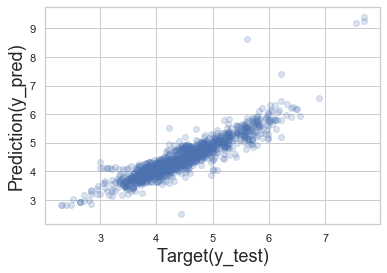

In [53]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Target(y_test)', size=18)
plt.ylabel('Prediction(y_pred)', size = 18)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

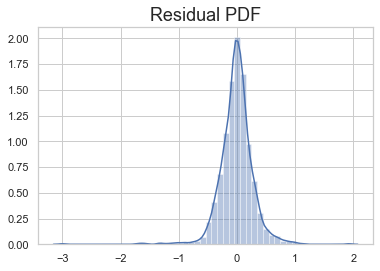

In [54]:
sns.distplot(y_test-y_pred)
plt.title("Residual PDF",size=18)

In [55]:
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

In [56]:
df8 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(),'Difference':y_test.flatten()-y_pred.flatten() })
#df7.sort_values("Difference",axis = 0, ascending = True,inplace = True)
df8.head(10)

,Actual,Predicted,Difference
0,42.00,67.724631,-25.724631
1,75.00,75.417826,-0.417826
2,225.00,90.821803,134.178197
3,46.00,41.005788,4.994212
4,48.00,50.540809,-2.540809
5,65.50,115.398962,-49.898962
6,73.31,70.843533,2.466467
7,78.50,71.740274,6.759726
8,405.00,305.383198,99.616802
9,95.00,99.871667,-4.871667
